## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## CLASE 2: EDA + Visualización + Preprocesamiento

In [ ]:
'''
En este ejercicio vamos a analizar el dataset de un seguro médico, este dataset contiene características de una persona y el precio que se le aplica

Vamos a realizar lo siguiente:

EDA: Explorar los datos
Data Cleaning: Limpiar los datos en blanco, así como detectar outliers y errores lógicos de información
Visualization
Pre-processing
¡Vamos a ello!
'''

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/dataset_seguros_sin_nulos.csv', sep = ';')

In [ ]:
'''1. ESTRUCTURA DE DATOS '''

In [4]:
df.head() 

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
0,37,MASCULINO,29.830,80,2,1,NO,BARCELONA,534
1,25,MASCULINO,26.220,71,0,0,NO,BARCELONA,227
2,52,FEMENINO,30.780,83,1,1,NO,BARCELONA,900
3,23,MASCULINO,23.845,64,0,0,NO,BARCELONA,200
4,60,FEMENINO,36.005,97,0,0,NO,BARCELONA,1102


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         1338 non-null   int64  
 1   SEXO         1338 non-null   object 
 2   IMC          1338 non-null   float64
 3   PESO         1338 non-null   int64  
 4   HIJOS        1338 non-null   int64  
 5   TIENE_HIJOS  1338 non-null   int64  
 6   FUMADOR      1338 non-null   object 
 7   CIUDAD       1338 non-null   object 
 8   PRECIO       1338 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


In [6]:
df.describe()

,EDAD,IMC,PESO,HIJOS,TIENE_HIJOS,PRECIO
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.667231,82.444694,1.091928,0.568759,1105.854260
std,14.049960,6.095439,16.389299,1.206345,0.495435,1009.161649
min,18.000000,15.960000,43.000000,0.000000,0.000000,93.000000
25%,27.000000,26.315000,71.000000,0.000000,0.000000,395.250000
50%,39.000000,30.400000,82.000000,1.000000,1.000000,781.500000
75%,51.000000,34.693750,93.000000,2.000000,1.000000,1386.500000
max,64.000000,53.130000,143.000000,5.000000,1.000000,5314.000000


In [7]:
df.shape


(1338, 9)

In [8]:
'''2. DETECCION DE NULOS'''

'2. DETECCION DE NULOS'

In [ ]:
#ya esta sin nulos, tengo el dataset con nulos tambien para practicar (se hara en otro libro de colab)

In [9]:
df.isnull().sum()

EDAD           0
SEXO           0
IMC            0
PESO           0
HIJOS          0
TIENE_HIJOS    0
FUMADOR        0
CIUDAD         0
PRECIO         0
dtype: int64

In [10]:
'''3. VERIFICAMOS FILAS REPETIDAS'''

'3. VERIFICAMOS FILAS REPETIDAS'

In [11]:
df[df.duplicated()] #esta linea es la que en otro lado se encuentra repetida

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
459,19,MASCULINO,30.59,82,0,0,NO,SEVILLA,137


In [12]:
df.drop_duplicates(inplace=True)

In [ ]:
'''4. ANALISIS UNIVARIABLE'''

In [13]:
### edad
df['EDAD'].value_counts()

18    69
19    67
45    29
52    29
51    29
47    29
48    29
20    29
46    29
50    29
27    28
25    28
26    28
53    28
49    28
22    28
54    28
23    28
21    28
24    28
28    28
43    27
44    27
31    27
42    27
40    27
30    27
41    27
29    27
55    26
33    26
57    26
32    26
56    26
34    26
36    25
59    25
58    25
38    25
35    25
39    25
37    25
61    23
63    23
62    23
60    23
64    22
Name: EDAD, dtype: int64

array([[<Axes: title={'center': 'EDAD'}>]], dtype=object)

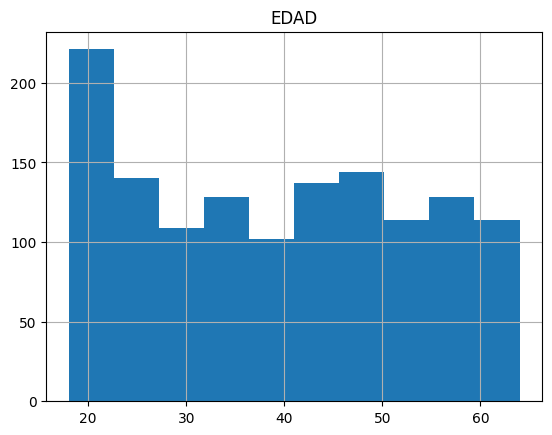

In [14]:
df.hist('EDAD')

In [15]:
df['EDAD'].unique() #estos son los valores que toma en las diferentes lineas esta columna en concreto (es parecido al value_counts)

array([37, 25, 52, 23, 60, 34, 63, 18, 35, 24, 38, 58, 43, 31, 22, 45, 59,
       56, 30, 44, 26, 61, 20, 32, 42, 40, 47, 27, 41, 36, 64, 28, 53, 33,
       29, 50, 55, 49, 54, 46, 57, 48, 39, 21, 62, 51, 19])

In [16]:
df['EDAD'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: EDAD, dtype: float64

In [17]:
### sexo
df['SEXO'].value_counts()

MASCULINO    677
FEMENINO     660
Name: SEXO, dtype: int64

array([[<Axes: title={'center': 'IMC'}>]], dtype=object)

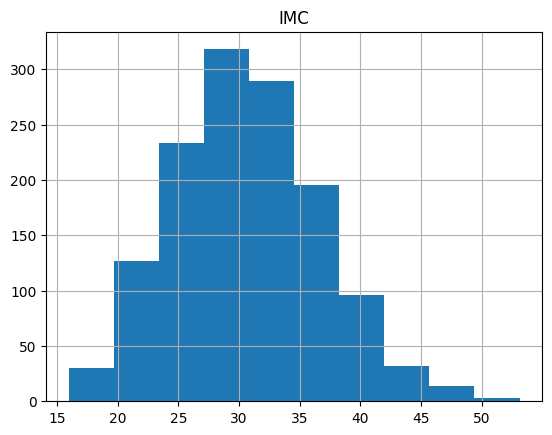

In [18]:
### IMC
df.hist('IMC')

Vamos a hacer un for para no ir una por una.

In [19]:
for i in df:
  print(i, df[i].value_counts())

EDAD 18    69
19    67
45    29
52    29
51    29
47    29
48    29
20    29
46    29
50    29
27    28
25    28
26    28
53    28
49    28
22    28
54    28
23    28
21    28
24    28
28    28
43    27
44    27
31    27
42    27
40    27
30    27
41    27
29    27
55    26
33    26
57    26
32    26
56    26
34    26
36    25
59    25
58    25
38    25
35    25
39    25
37    25
61    23
63    23
62    23
60    23
64    22
Name: EDAD, dtype: int64
SEXO MASCULINO    677
FEMENINO     660
Name: SEXO, dtype: int64
IMC 32.300    13
28.310     9
30.495     8
30.875     8
30.800     8
          ..
40.480     1
26.070     1
24.090     1
28.380     1
44.700     1
Name: IMC, Length: 547, dtype: int64
PESO 80     46
75     41
83     35
74     34
78     34
       ..
132     1
46      1
43      1
129     1
123     1
Name: PESO, Length: 89, dtype: int64
HIJOS 0    576
1    322
2    239
3    157
4     25
5     18
Name: HIJOS, dtype: int64
TIENE_HIJOS 1    761
0    576
Name: TIENE_HIJOS, dtype: int64

In [20]:
for i in df:
  print(i, df[i].unique())

EDAD [37 25 52 23 60 34 63 18 35 24 38 58 43 31 22 45 59 56 30 44 26 61 20 32
 42 40 47 27 41 36 64 28 53 33 29 50 55 49 54 46 57 48 39 21 62 51 19]
SEXO ['MASCULINO' 'FEMENINO']
IMC [29.83  26.22  30.78  23.845 36.005 31.92  23.085 26.315 36.67  26.6
 37.05  38.665 35.625 31.825 27.36  28.5   39.805 26.885 38.285 19.95
 25.46  30.115 32.205 28.595 23.75  31.35  28.785 26.505 22.04  22.42
 32.49  37.145 23.37  25.175 28.215 18.905 15.96  33.155 41.895 39.33
 28.88  27.74  41.23  33.25  31.635 22.135 28.975 17.29  25.365 24.32
 32.395 25.84  27.455 28.12  40.565 27.645 48.07  36.765 29.64  22.99
 27.55  22.61  34.865 32.775 37.335 40.945 34.105 36.385 35.72  32.3
 33.345 35.245 30.4   22.23  24.89  17.955 30.685 31.445 38.38  20.235
 17.195 30.59  27.265 31.73  16.815 29.45  38.095 25.935 31.065 25.08
 27.93  26.03  25.27  32.11  30.875 33.915 39.425 28.025 35.435 41.325
 33.44  32.68  36.86  34.295 23.465 35.91  21.85  33.725 26.98  19.
 33.535 22.705 38.19  26.41  31.54  32.015 31.16 

In [ ]:
'''5. SEPARAMOS NUESTRAS VARIABLES EN: TARGET, CATEGORICAS, BOOLEAN Y NUMERICAS'''

In [21]:
target = ['PRECIO']
def variables(dataset):
  lista_numerica = []
  lista_bool = []
  lista_categorica = []

  for i in dataset:
    if (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') and i not in target and len(dataset[i].unique()) !=2: #condicion para que SOLO coja los numericos
      lista_numerica.append(i)
    elif (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') and i not in target and len(dataset[i].unique()) ==2: #condicion para que SOLO coja los numericos
      lista_bool.append(i)
    elif (dataset[i].dtype.kind == 'O') and i not in target: 
      lista_categorica.append(i)


  return lista_numerica, lista_bool, lista_categorica

In [22]:
l_num, l_bool, l_cat = variables(df)

In [23]:
l_num

['EDAD', 'IMC', 'PESO', 'HIJOS']

In [24]:
l_cat

['SEXO', 'FUMADOR', 'CIUDAD']

In [25]:
l_bool

['TIENE_HIJOS']

In [ ]:
'''6. LOGICA DE LAS VARIABLES'''

EDAD [[<Axes: title={'center': 'EDAD'}>]]
IMC [[<Axes: title={'center': 'IMC'}>]]
PESO [[<Axes: title={'center': 'PESO'}>]]
HIJOS [[<Axes: title={'center': 'HIJOS'}>]]


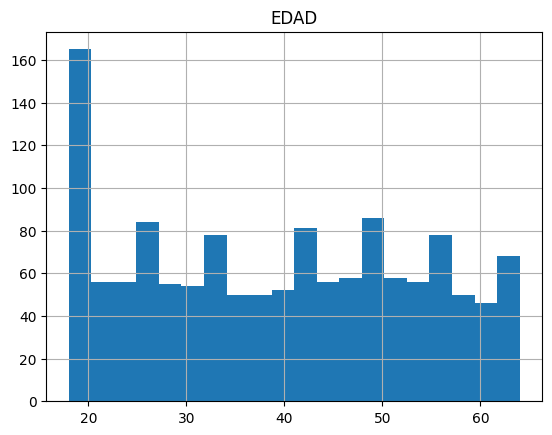

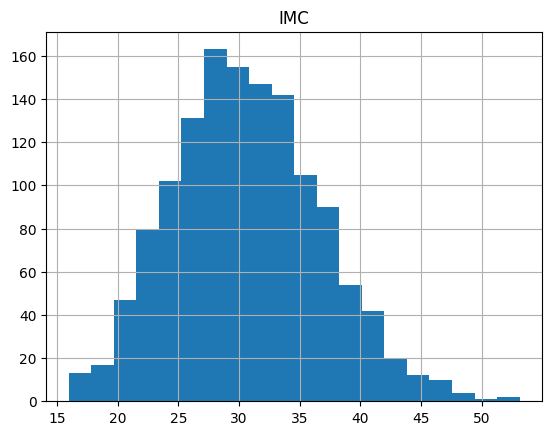

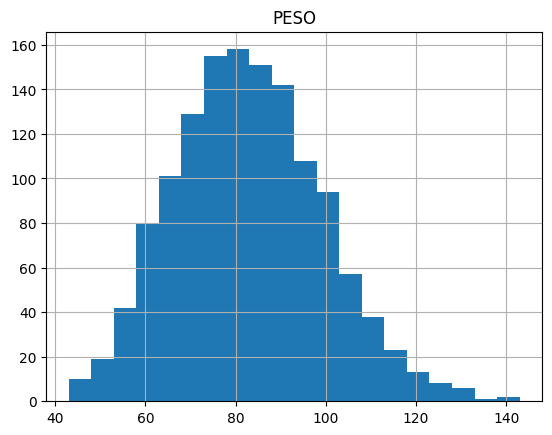

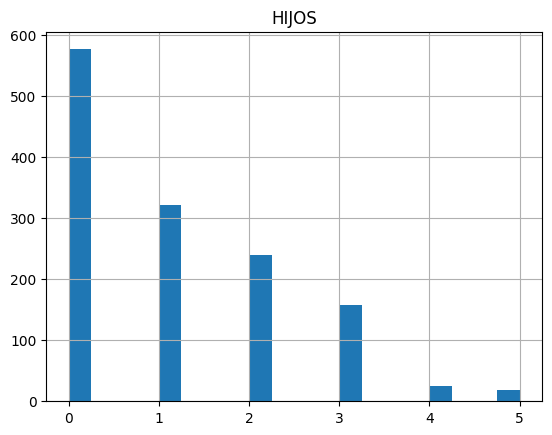

In [26]:
#PRIMERO VAMOS CON LAS NUMERICAS
for i in l_num:
  print(i, df.hist(i, bins = 20))

In [27]:
df['HIJOS'].value_counts(
    
) #a ver si hay problemas puesto que el histograma arroja una duda entre los valores 4 y 5 (que parece haber algun valor decimal) ---> CON EL VALUE COUNTS VEMOS QUE NO

0    576
1    322
2    239
3    157
4     25
5     18
Name: HIJOS, dtype: int64

In [28]:
#SEGUIDAMENTE CON LAS categoricas
for i in l_cat:
  print(i, df[i].value_counts())

SEXO MASCULINO    677
FEMENINO     660
Name: SEXO, dtype: int64
FUMADOR NO    1063
SI     274
Name: FUMADOR, dtype: int64
CIUDAD MADRID       364
VALENCIA     325
BARCELONA    324
SEVILLA      324
Name: CIUDAD, dtype: int64


In [ ]:
#asi vemos que toda la informacion tiene sentido y esta limpia
#este dataframe ya lo pasamos a Power BI para hacer presentaciones con estadisticos e informacion valida de negocio

In [29]:
df2 = df.copy()

In [ ]:
'''7. PREPROCESAMIENTO'''

In [ ]:
'''7.1 CORRELACION: DETECTAR SI HAY VARIABLES QUE EXPLICAN LO MISMO'''


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         1337 non-null   int64  
 1   SEXO         1337 non-null   object 
 2   IMC          1337 non-null   float64
 3   PESO         1337 non-null   int64  
 4   HIJOS        1337 non-null   int64  
 5   TIENE_HIJOS  1337 non-null   int64  
 6   FUMADOR      1337 non-null   object 
 7   CIUDAD       1337 non-null   object 
 8   PRECIO       1337 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 104.5+ KB


In [31]:
corr = df2.corr()

<ipython-input-31-7d92656a0bd6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


In [32]:
corr.style.background_gradient(cmap = 'coolwarm') #asi vemos la relacion entre variables, es importante porque podemos detectar dos que digan lo mismo
#VEMOS QUE IMC Y PESO TIENEN UNA CORRELACION (OBVIAMENTE) SUPER ALTA, VIENEN A DECIR LO MISMO; TENEMOS QUE TOMAR UNA DECISION PUESTO QUE LAS VARIABLES TIENEN QUE SER INDEPENDIENTES
#SI DOS VARIABLES 'DICEN' LO MISMO, VAMOS A FALSEAR EL PESO QUE TIENEN DENTRO DEL MODELO:
#PODEMOS ENTRENAR AL MODELO CON UNA, VALORAR Y LUEGO CON LA OTRA A VER CUAL FUNCIONA MEJOR
#EN ESTE CASO TENIENDO VISION DE NEGOCIO, EL IMC SERIA MUCHO MAS IMPORTANTE E INFORMACION VALIDA QUE EL PESO A SECAS

,EDAD,IMC,PESO,HIJOS,TIENE_HIJOS,PRECIO
EDAD,1.000000,0.107742,0.110609,0.041016,0.044213,0.298308
IMC,0.107742,1.000000,0.997731,0.011157,0.013901,0.197793
PESO,0.110609,0.997731,1.000000,0.013540,0.015882,0.199910
HIJOS,0.041016,0.011157,0.013540,1.000000,0.788314,0.065633
TIENE_HIJOS,0.044213,0.013901,0.015882,0.788314,1.000000,0.061246
PRECIO,0.298308,0.197793,0.199910,0.065633,0.061246,1.000000


In [33]:
df3 = df2.copy()

In [34]:
del(df3['PESO'])

In [36]:
l_num2, l_bool2, l_cat2 = variables(df3)

In [ ]:
'''7.2 ANALISIS DEL TARGET'''

array([[<Axes: title={'center': 'PRECIO'}>]], dtype=object)

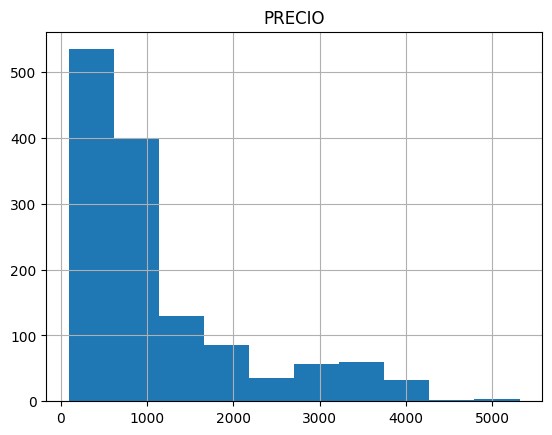

In [37]:
df3.hist('PRECIO') #POR LO GENERAL LAS COMPAÑIAS DE SEGUROS TIENE MAS POLIZAS BARATAS; EL GRAFICO TIENE BUENA PINTA


In [ ]:
#LA DISTRIBUCIÓN DEL TARGET TIENE QUE SER D.NORMAL!!!
#podemos dejarlo asi y que el modelo se apañe
#o podemos transformar esta variable a normal para facilitarle el trabajo al modelo  obtener mejores resultados ----> TRANSFORMACION LOGARITMICA (FUNCIONA EN EL 90% DE LOS CASOS)

<Axes: xlabel='PRECIO'>

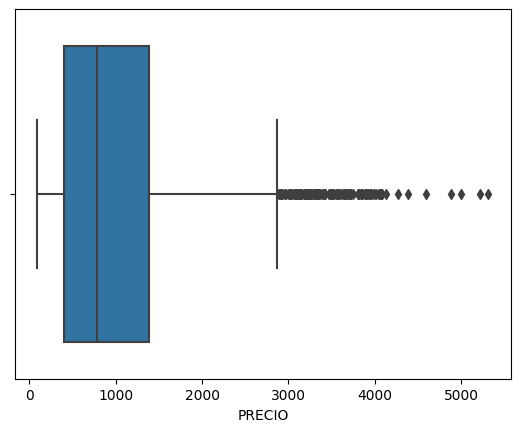

In [38]:
sns.boxplot(x=df3['PRECIO']) # LOS PUNTOS QUE SE ENCUENTRAN FUERA DE LAS LINEAS PARALELAS ---> SON OUTLIERS Y NO LE VAN A SERVIR AL MODELO

In [43]:
df3['LOG_PRECIO'] = np.log10(df3['PRECIO'])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

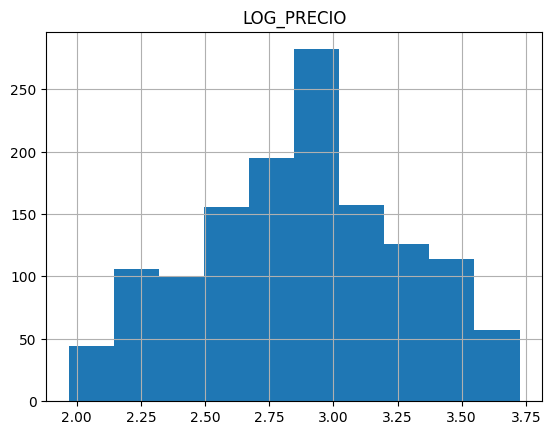

In [44]:
df3.hist('LOG_PRECIO') #muy buena distribucion normal!!

<Axes: xlabel='LOG_PRECIO'>

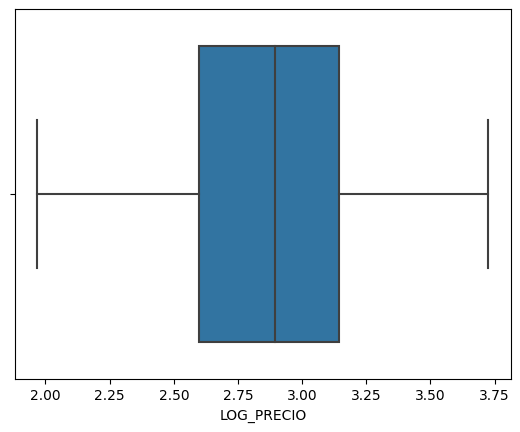

In [45]:
sns.boxplot(x=df3['LOG_PRECIO']) #YA NO HAY OUTLIERS!! 

In [ ]:
'''7.3 TARGET VS VARIABLES INDEPENDIENTES'''

In [ ]:
#ahora vamos a ver cuánto y cómo afecta cada variable con respecto al TARGET

In [47]:
l_cat2

['SEXO', 'FUMADOR', 'CIUDAD']

<Axes: xlabel='SEXO', ylabel='PRECIO'>

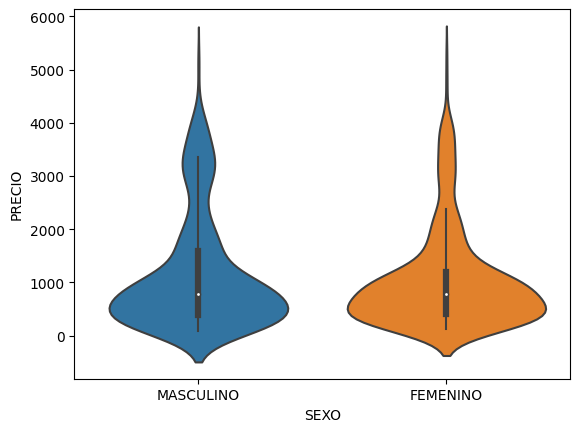

In [46]:
sns.violinplot(x='SEXO',y='PRECIO',data=df3) #muy poca diferencia entre ambos atributos; la variable sexo no es muy relevante para predecir el precio
#violinplot con categoricas!!

<Axes: xlabel='FUMADOR', ylabel='PRECIO'>

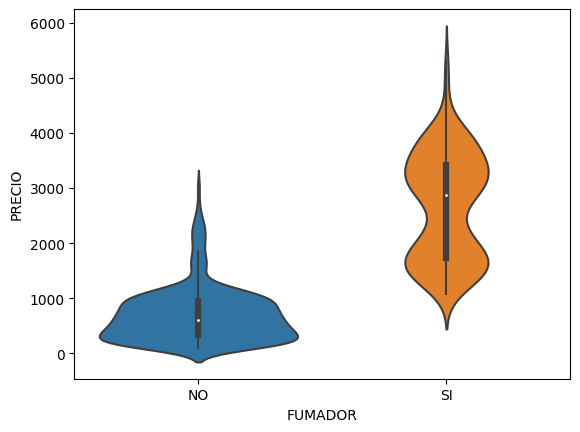

In [48]:
sns.violinplot(x='FUMADOR',y='PRECIO',data=df3) #las polizas de los fumadores tienden a ser mas altas!! hay diferencia entre ambos atributos; esta variable afecta claramente al precio!!

<Axes: xlabel='CIUDAD', ylabel='PRECIO'>

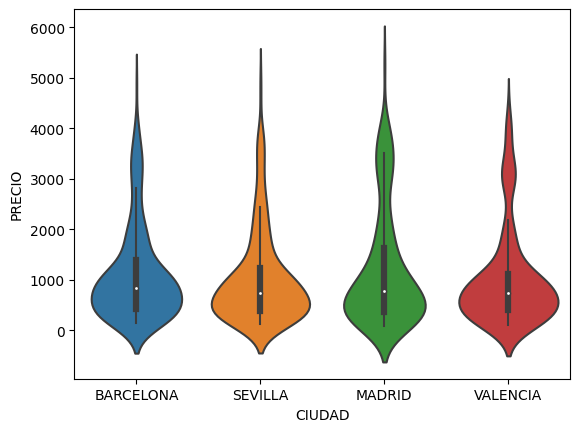

In [49]:
sns.violinplot(x='CIUDAD',y='PRECIO',data=df3) #MAS O MENOS NO HAY DIFERENCIA ENTRE CIUDADES POR LO QUE NO VA A SER UNA VARIABLE QUE AFECTE MUCHO AL PRECIO

In [50]:
l_num2

['EDAD', 'IMC', 'HIJOS']

<Axes: xlabel='EDAD', ylabel='PRECIO'>

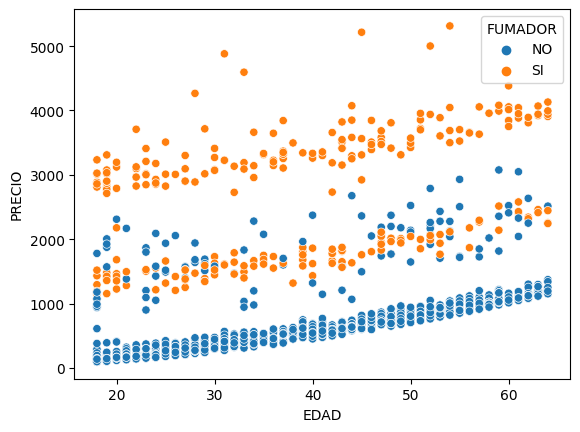

In [52]:
#para numericas es aconsejable el scatterplot
sns.scatterplot(x='EDAD', y='PRECIO', hue = 'FUMADOR', data=df3) #NO PARECE SER MUY REPRESENTATIVA LA EDAD POR EL SOLO; HUE ES PARA ACOPLAR UNA L_CAT EN ESTE GRAFICO

In [ ]:
'''7.4 REESCALAR VARIABLES'''

In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         1337 non-null   int64  
 1   SEXO         1337 non-null   object 
 2   IMC          1337 non-null   float64
 3   HIJOS        1337 non-null   int64  
 4   TIENE_HIJOS  1337 non-null   int64  
 5   FUMADOR      1337 non-null   object 
 6   CIUDAD       1337 non-null   object 
 7   PRECIO       1337 non-null   int64  
 8   LOG_PRECIO   1337 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 104.5+ KB


In [54]:
target = ['PRECIO','LOG_PRECIO']
l_num2, l_bool2, l_cat2 = variables(df3)

In [ ]:
'''
Nuestro objetivo es predecir el precio del seguro médico, vamos a utilizar las siguientes estrategias
Label Encoding
One Hot Encoding
Min max scaling
'''
#PARA HACER ESTA PREDICCION (MEDIANTE EL MODELO MAS SENCILLO QUE ES EL DE REGRESION LINEAL), NECESITAMOS QUE LAS VARIABLES SEAN TODAS NUMERICAS
#ESTO ES PORQUE EL MODELO LE VA A DAR CIERTO PESO A CADA VARIABLE
#PARA ELLO USAMOS LABEL ENCODING Y ONE HOT ENCODING ---> CATEGORICAS A NUMERICAS

#LABEL ENCODER: A CADA ATRIBUTO CATEGORICO QUE SE VA ENCONTRANDO LE VA  PONIENDO DEL 0 ASCENDIENDO EN EL ORDEN EN EL QUE SE LAS VAYA ENCONTRANDO
'''
SEVILLA -- 0
MADRID -- 1
ETC
'''

In [55]:
#LABEL ENCODER
la = LabelEncoder()

In [57]:
df3['CIUDAD_2']=la.fit_transform(df3['CIUDAD'])

In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         1337 non-null   int64  
 1   SEXO         1337 non-null   object 
 2   IMC          1337 non-null   float64
 3   HIJOS        1337 non-null   int64  
 4   TIENE_HIJOS  1337 non-null   int64  
 5   FUMADOR      1337 non-null   object 
 6   CIUDAD       1337 non-null   object 
 7   PRECIO       1337 non-null   int64  
 8   LOG_PRECIO   1337 non-null   float64
 9   CIUDAD_2     1337 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 114.9+ KB


In [ ]:
#EL LABER ENCODER SOLO TIENE SENTIDO SI DENTRO DE LA CATEGORIA ENCONTRAMOS UN ORDEN NUMERICO O UN RANKING; ESTE NO ES EL CASO ASI QUE VAMOS A VER ONE HOT ENCODING 

In [61]:
del(df3['CIUDAD_2'])

In [63]:
df4 = pd.get_dummies(data=df3, columns = l_cat2)

In [65]:
df4.head()

,EDAD,IMC,HIJOS,TIENE_HIJOS,PRECIO,LOG_PRECIO,SEXO_FEMENINO,SEXO_MASCULINO,FUMADOR_NO,FUMADOR_SI,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
0,37,29.830,2,1,534,2.727541,0,1,1,0,1,0,0,0
1,25,26.220,0,0,227,2.356026,0,1,1,0,1,0,0,0
2,52,30.780,1,1,900,2.954243,1,0,1,0,1,0,0,0
3,23,23.845,0,0,200,2.301030,0,1,1,0,1,0,0,0
4,60,36.005,0,0,1102,3.042182,1,0,1,0,1,0,0,0


In [ ]:
#ya esta dataset listo para el modelo pero hay que hacer una correlacion final

In [67]:
corr2 = df4.corr()

In [68]:
corr2.style.background_gradient(cmap='coolwarm')

,EDAD,IMC,HIJOS,TIENE_HIJOS,PRECIO,LOG_PRECIO,SEXO_FEMENINO,SEXO_MASCULINO,FUMADOR_NO,FUMADOR_SI,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
EDAD,1.000000,0.107742,0.041016,0.044213,0.298308,0.526933,0.019542,-0.019542,0.025587,-0.025587,0.001868,-0.012311,0.001495,0.009415
IMC,0.107742,1.000000,0.011157,0.013901,0.197793,0.131903,-0.048800,0.048800,-0.003428,0.003428,-0.137127,0.269794,-0.136556,-0.006571
HIJOS,0.041016,0.011157,1.000000,0.788314,0.065633,0.158026,-0.018870,0.018870,-0.008586,0.008586,-0.027572,-0.021958,0.027429,0.022928
TIENE_HIJOS,0.044213,0.013901,0.788314,1.000000,0.061246,0.149085,-0.020126,0.020126,-0.011388,0.011388,-0.036715,-0.000622,0.030259,0.007095
PRECIO,0.298308,0.197793,0.065633,0.061246,1.000000,0.893079,-0.058033,0.058033,-0.787238,0.787238,0.005953,0.073575,-0.038700,-0.043637
LOG_PRECIO,0.526933,0.131903,0.158026,0.149085,0.893079,1.000000,-0.007614,0.007614,-0.665713,0.665713,0.042409,0.014998,-0.015460,-0.042485
SEXO_FEMENINO,0.019542,-0.048800,-0.018870,-0.020126,-0.058033,-0.007614,1.000000,-1.000000,0.075079,-0.075079,-0.003282,-0.015749,0.014174,0.005462
SEXO_MASCULINO,-0.019542,0.048800,0.018870,0.020126,0.058033,0.007614,-1.000000,1.000000,-0.075079,0.075079,0.003282,0.015749,-0.014174,-0.005462
FUMADOR_NO,0.025587,-0.003428,-0.008586,-0.011388,-0.787238,-0.665713,0.075079,-0.075079,1.000000,-1.000000,-0.002597,-0.068282,0.036321,0.037168
FUMADOR_SI,-0.025587,0.003428,0.008586,0.011388,0.787238,0.665713,-0.075079,0.075079,-1.000000,1.000000,0.002597,0.068282,-0.036321,-0.037168


In [ ]:
#si dos variables tienen una correlacion total directa o inversa (1 o -1), tenemos que eliminar una de ellas; es informacion redundante 

In [69]:
df4.drop(['SEXO_MASCULINO','FUMADOR_NO'],axis=1,inplace=True)

In [70]:
df4.head()

,EDAD,IMC,HIJOS,TIENE_HIJOS,PRECIO,LOG_PRECIO,SEXO_FEMENINO,FUMADOR_SI,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
0,37,29.830,2,1,534,2.727541,0,0,1,0,0,0
1,25,26.220,0,0,227,2.356026,0,0,1,0,0,0
2,52,30.780,1,1,900,2.954243,1,0,1,0,0,0
3,23,23.845,0,0,200,2.301030,0,0,1,0,0,0
4,60,36.005,0,0,1102,3.042182,1,0,1,0,0,0


In [73]:
pd.to_pickle(df4,'/content/drive/MyDrive/Datasets/df_seguros_final')